Objetivo: Através de um título passado, com base em análise de "emoção" no título, prever se terá um `Rhythm` *Slow (0)*, *Normal (1)* ou *High (2)*

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [102]:
df = pd.read_csv('nijigasaki_songs.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         142 non-null    object 
 1   album         142 non-null    object 
 2   attribution   142 non-null    object 
 3   members       142 non-null    object 
 4   release_date  142 non-null    object 
 5   bpm           141 non-null    float64
 6   duration      139 non-null    object 
dtypes: float64(1), object(6)
memory usage: 7.9+ KB


In [103]:
def durations_mean(track_durations: list[str]) -> str:
    total_seconds = 0
    for duration in track_durations:
        if np.nan_to_num(duration) != 0.0:
            minutes, seconds = map(int, str(np.nan_to_num(duration)).split(':'))
            total_seconds += minutes * 60 + seconds

    mean_seconds = total_seconds / len(track_durations)
    mean_aproach = round(mean_seconds)

    minutes = mean_aproach // 60
    seconds = mean_aproach % 60

    return f"{minutes}:{seconds:02d}"

In [104]:
df['duration'].fillna(durations_mean(df['duration']), inplace=True)

C:\Users\felip\AppData\Local\Temp\ipykernel_24640\3311466427.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna(durations_mean(df['duration']), inplace=True)


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         142 non-null    object 
 1   album         142 non-null    object 
 2   attribution   142 non-null    object 
 3   members       142 non-null    object 
 4   release_date  142 non-null    object 
 5   bpm           141 non-null    float64
 6   duration      142 non-null    object 
dtypes: float64(1), object(6)
memory usage: 7.9+ KB


In [106]:
df['bpm'].fillna(df['bpm'].mean(), inplace=True)

C:\Users\felip\AppData\Local\Temp\ipykernel_24640\81797966.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bpm'].fillna(df['bpm'].mean(), inplace=True)


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         142 non-null    object 
 1   album         142 non-null    object 
 2   attribution   142 non-null    object 
 3   members       142 non-null    object 
 4   release_date  142 non-null    object 
 5   bpm           142 non-null    float64
 6   duration      142 non-null    object 
dtypes: float64(1), object(6)
memory usage: 7.9+ KB


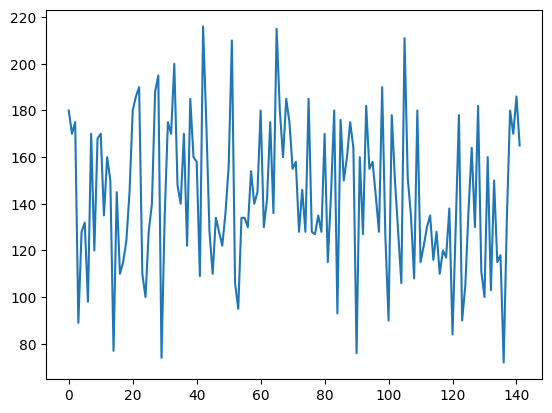

In [108]:
plt.plot(df['bpm'])

In [109]:
df['Rhythm'] = df['bpm'].apply(lambda bpm: 'Exciting' if bpm > 160 else 'Normal')

In [110]:
df.head()

,title,album,attribution,members,release_date,bpm,duration,Rhythm
0,TOKIMEKI Runners,TOKIMEKI Runners,Nijigasaki (9 Members),"Ayumu Uehara, Kasumi Nakasu, Shizuku Osaka, Ka...",2018.11.21,180.0,4:36,Exciting
1,Yume e no Ippo,TOKIMEKI Runners,Ayumu Uehara,Ayumu Uehara,2018.11.21,170.0,4:47,Exciting
2,Diamond,TOKIMEKI Runners,Kasumi Nakasu,Kasumi Nakasu,2018.11.21,175.0,3:53,Exciting
3,Anata no Risou no Heroine,TOKIMEKI Runners,Shizuku Osaka,Shizuku Osaka,2018.11.21,89.0,5:26,Normal
4,Starlight,TOKIMEKI Runners,Karin Asaka,Karin Asaka,2018.11.21,128.0,3:44,Normal


In [111]:
df['Rhythm_Label'] = df['Rhythm'].apply(lambda r: 0 if r == 'Normal' else 1)

In [112]:
df['release_date'] = df['release_date'].apply(lambda date: str(date).replace('.', '/'))

In [113]:
df.head()

,title,album,attribution,members,release_date,bpm,duration,Rhythm,Rhythm_Label
0,TOKIMEKI Runners,TOKIMEKI Runners,Nijigasaki (9 Members),"Ayumu Uehara, Kasumi Nakasu, Shizuku Osaka, Ka...",2018/11/21,180.0,4:36,Exciting,1
1,Yume e no Ippo,TOKIMEKI Runners,Ayumu Uehara,Ayumu Uehara,2018/11/21,170.0,4:47,Exciting,1
2,Diamond,TOKIMEKI Runners,Kasumi Nakasu,Kasumi Nakasu,2018/11/21,175.0,3:53,Exciting,1
3,Anata no Risou no Heroine,TOKIMEKI Runners,Shizuku Osaka,Shizuku Osaka,2018/11/21,89.0,5:26,Normal,0
4,Starlight,TOKIMEKI Runners,Karin Asaka,Karin Asaka,2018/11/21,128.0,3:44,Normal,0


In [114]:
df['members'].unique()

array(['Ayumu Uehara, Kasumi Nakasu, Shizuku Osaka, Karin Asaka, Ai Miyashita, Kanata Konoe, Setsuna Yuki, Emma Verde, Rina Tennoji',
       'Ayumu Uehara', 'Kasumi Nakasu', 'Shizuku Osaka', 'Karin Asaka',
       'Ai Miyashita', 'Kanata Konoe', 'Setsuna Yuki', 'Emma Verde',
       'Rina Tennoji',
       'Ayumu Uehara, Kasumi Nakasu, Shizuku Osaka, Karin Asaka, Ai Miyashita, Kanata Konoe, Setsuna Yuki, Emma Verde, Rina Tennoji, Shioriko Mifune',
       'Shioriko Mifune',
       'Ayumu Uehara, Kasumi Nakasu, Shizuku Osaka, Karin Asaka, Ai Miyashita, Kanata Konoe, Setsuna Yuki, Emma Verde, Rina Tennoji, Shioriko Mifune, Mia Taylor, Lanzhu Zhong',
       'Mia Taylor', 'Lanzhu Zhong',
       'Shioriko Mifune, Mia Taylor, Lanzhu Zhong',
       'Karin Asaka, Ai Miyashita',
       'Ayumu Uehara, Shizuku Osaka, Setsuna Yuki',
       'Kasumi Nakasu, Kanata Konoe, Emma Verde, Rina Tennoji',
       'Kasumi Nakasu, Shizuku Osaka, Rina Tennoji, Shioriko Mifune'],
      dtype=object)

In [115]:
df[df['Rhythm_Label'] == 0]['title']

3       Anata no Risou no Heroine
4                       Starlight
5                  Meccha Going!!
6      Nemureru Mori ni Ikitai na
8                       Evergreen
                  ...            
133                 Hurray Hurray
134                   Fashionista
135               Fuwa Fuwa Hour!
136            Romance no Naka de
137                Look at me now
Name: title, Length: 99, dtype: object

In [116]:
df[df['Rhythm_Label'] == 2]['title']

Series([], Name: title, dtype: object)

In [124]:
# %pip install nltk

In [118]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

In [119]:
# nltk.download('all')

In [120]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text


df['title'] = df['title'].apply(preprocess_text)

In [121]:
df.head()

,title,album,attribution,members,release_date,bpm,duration,Rhythm,Rhythm_Label
0,tokimeki runner,TOKIMEKI Runners,Nijigasaki (9 Members),"Ayumu Uehara, Kasumi Nakasu, Shizuku Osaka, Ka...",2018/11/21,180.0,4:36,Exciting,1
1,yume e ippo,TOKIMEKI Runners,Ayumu Uehara,Ayumu Uehara,2018/11/21,170.0,4:47,Exciting,1
2,diamond,TOKIMEKI Runners,Kasumi Nakasu,Kasumi Nakasu,2018/11/21,175.0,3:53,Exciting,1
3,anata risou heroine,TOKIMEKI Runners,Shizuku Osaka,Shizuku Osaka,2018/11/21,89.0,5:26,Normal,0
4,starlight,TOKIMEKI Runners,Karin Asaka,Karin Asaka,2018/11/21,128.0,3:44,Normal,0


In [122]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment


df['sentiment'] = df['title'].apply(get_sentiment)

df.head(15)

,title,album,attribution,members,release_date,bpm,duration,Rhythm,Rhythm_Label,sentiment
0,tokimeki runner,TOKIMEKI Runners,Nijigasaki (9 Members),"Ayumu Uehara, Kasumi Nakasu, Shizuku Osaka, Ka...",2018/11/21,180.0,4:36,Exciting,1,0
1,yume e ippo,TOKIMEKI Runners,Ayumu Uehara,Ayumu Uehara,2018/11/21,170.0,4:47,Exciting,1,0
2,diamond,TOKIMEKI Runners,Kasumi Nakasu,Kasumi Nakasu,2018/11/21,175.0,3:53,Exciting,1,1
3,anata risou heroine,TOKIMEKI Runners,Shizuku Osaka,Shizuku Osaka,2018/11/21,89.0,5:26,Normal,0,1
4,starlight,TOKIMEKI Runners,Karin Asaka,Karin Asaka,2018/11/21,128.0,3:44,Normal,0,0
5,meccha going ! !,TOKIMEKI Runners,Ai Miyashita,Ai Miyashita,2018/11/21,132.0,4:46,Normal,0,0
6,nemureru mori ni ikitai na,TOKIMEKI Runners,Kanata Konoe,Kanata Konoe,2018/11/21,98.0,3:24,Normal,0,0
7,chase !,TOKIMEKI Runners,Setsuna Yuki,Setsuna Yuki,2018/11/21,170.0,4:18,Exciting,1,0
8,evergreen,TOKIMEKI Runners,Emma Verde,Emma Verde,2018/11/21,120.0,4:55,Normal,0,0
9,doki pipo * emotion,TOKIMEKI Runners,Rina Tennoji,Rina Tennoji,2018/11/21,168.0,4:30,Exciting,1,0


<Axes: >

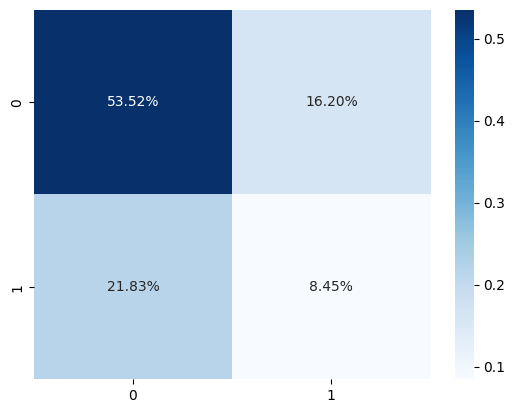

In [123]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(df['Rhythm_Label'], df['sentiment'])

sn.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<Axes: >

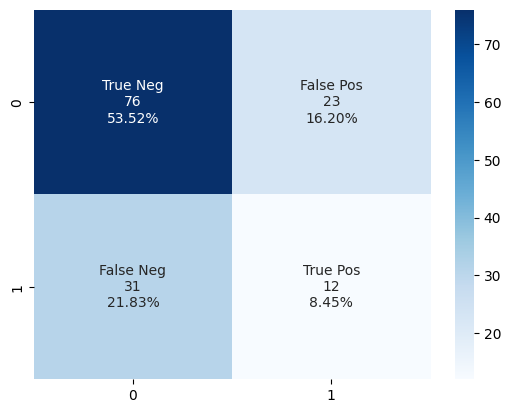

In [127]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(labels,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(matrix, annot=labels, fmt='', cmap='Blues')